## 크롬드라이버 받는곳 

http://chromedriver.chromium.org/downloads 

## 서울시 구별 주유소 가격 정보 얻기

In [7]:
from selenium import webdriver

In [9]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

- 상단메뉴에서 [주유소/충전소 찾기]-[지역별] 에서 서울 입력 

### http://www.opinet.co.kr/searRgSelect.do#

### xpath 이용하기 

- html에서 [Copy]-[Copy xPAth]
- 변수 = driver.find_element_by_xpath("""xPath""")
- 변수.find_elements_by_tag_name("태그명")

In [12]:
# 구 옵션메뉴 클릭 
# [F12] 소스 편집창에서 [Copy]-[Xpath]
# //*[@id="SIGUNGU_NM0"]
# //*[@id="SIGUNGU_NM0"]

gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
# gu_list_raw
gu_list = gu_list_raw.find_elements_by_tag_name("option")
len(gu_list)

26

### "value" 값으로 구이름 추출하기 

- get_attribute('속성') => 속성값 추출

In [14]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

### 강남구에 대한 주유소 지도 표시하기 

In [16]:
# 강남구 지정하기 
#  #SIGUNGU_NM0 는 2번째 옵션 [Copy]-[Copy Selector]
#  #SIGUNGU_NM0
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])
element

<selenium.webdriver.remote.webelement.WebElement (session="d9a7fb8866da55e0a9b34d9dcc3eab3e", element="e5518c84-22f0-46ee-b847-923c04daa5d9")>

In [17]:
# [조회] a 태그의 xpath 조회한 후 클릭 
# //*[@id="searRgSelect"]

xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [18]:
# 강남구 주유소 검색 페이지가 표시 
# 하단 [엑셀저장] 의 xpath 조회 
# //*[@id="glopopd_excel"]
# //*[@id="glopopd_excel"]

xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

## 서울 모든 구에 대한 주유소 엑셀 파일 저장하기 

In [19]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [ ]:
# 엑셀 파일이 다운로드 된다. 
# output_excel 폴더 생성후 다운로드한 파일 이동시키기 

In [20]:
import os
os.listdir('output_excel')
len(os.listdir('output_excel'))

26

In [21]:
driver.close()

## 구별 주유 가격에 대한 데이터의 정리

### golb 모듈의 glob() 를 이용하여 특정 폴더안의 엑셀 파일 리스트 생성

- 리스트변수 = glob.glob('폴더경로l/*.확장자')

In [22]:
import pandas as pd
import glob

In [23]:
glob.glob('output_excel/*.xls')

['output_excel\\지역_위치별(주유소) (49).xls',
 'output_excel\\지역_위치별(주유소) (50).xls',
 'output_excel\\지역_위치별(주유소) (51).xls',
 'output_excel\\지역_위치별(주유소) (52).xls',
 'output_excel\\지역_위치별(주유소) (53).xls',
 'output_excel\\지역_위치별(주유소) (54).xls',
 'output_excel\\지역_위치별(주유소) (55).xls',
 'output_excel\\지역_위치별(주유소) (56).xls',
 'output_excel\\지역_위치별(주유소) (57).xls',
 'output_excel\\지역_위치별(주유소) (58).xls',
 'output_excel\\지역_위치별(주유소) (59).xls',
 'output_excel\\지역_위치별(주유소) (60).xls',
 'output_excel\\지역_위치별(주유소) (61).xls',
 'output_excel\\지역_위치별(주유소) (62).xls',
 'output_excel\\지역_위치별(주유소) (63).xls',
 'output_excel\\지역_위치별(주유소) (64).xls',
 'output_excel\\지역_위치별(주유소) (65).xls',
 'output_excel\\지역_위치별(주유소) (66).xls',
 'output_excel\\지역_위치별(주유소) (67).xls',
 'output_excel\\지역_위치별(주유소) (68).xls',
 'output_excel\\지역_위치별(주유소) (69).xls',
 'output_excel\\지역_위치별(주유소) (70).xls',
 'output_excel\\지역_위치별(주유소) (71).xls',
 'output_excel\\지역_위치별(주유소) (72).xls',
 'output_excel\\지역_위치별(주유소) (73).xls',
 'output_excel\\지역_위치별(주유

In [25]:
# 특정폴더에 있는 모든 엑셀파일을 리스트로 생성 
stations_files = glob.glob('output_excel/*.xls')
stations_files

['output_excel\\지역_위치별(주유소) (49).xls',
 'output_excel\\지역_위치별(주유소) (50).xls',
 'output_excel\\지역_위치별(주유소) (51).xls',
 'output_excel\\지역_위치별(주유소) (52).xls',
 'output_excel\\지역_위치별(주유소) (53).xls',
 'output_excel\\지역_위치별(주유소) (54).xls',
 'output_excel\\지역_위치별(주유소) (55).xls',
 'output_excel\\지역_위치별(주유소) (56).xls',
 'output_excel\\지역_위치별(주유소) (57).xls',
 'output_excel\\지역_위치별(주유소) (58).xls',
 'output_excel\\지역_위치별(주유소) (59).xls',
 'output_excel\\지역_위치별(주유소) (60).xls',
 'output_excel\\지역_위치별(주유소) (61).xls',
 'output_excel\\지역_위치별(주유소) (62).xls',
 'output_excel\\지역_위치별(주유소) (63).xls',
 'output_excel\\지역_위치별(주유소) (64).xls',
 'output_excel\\지역_위치별(주유소) (65).xls',
 'output_excel\\지역_위치별(주유소) (66).xls',
 'output_excel\\지역_위치별(주유소) (67).xls',
 'output_excel\\지역_위치별(주유소) (68).xls',
 'output_excel\\지역_위치별(주유소) (69).xls',
 'output_excel\\지역_위치별(주유소) (70).xls',
 'output_excel\\지역_위치별(주유소) (71).xls',
 'output_excel\\지역_위치별(주유소) (72).xls',
 'output_excel\\지역_위치별(주유소) (73).xls',
 'output_excel\\지역_위치별(주유

### 엑셀파일 모두 합치고 데이타프레임 생성 

In [26]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [27]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1545,1385,-
1,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1733,1563,1404,-
2,서울특별시,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),GS칼텍스,02-2226-4963,Y,-,1565,1399,-
3,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),S-OIL,02-459-3434,Y,-,1569,1409,-
4,서울특별시,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,02-3462-5215,N,1749,1578,1419,1170


In [28]:
station_raw.shape

(544, 10)

In [29]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 15
Data columns (total 10 columns):
지역       544 non-null object
상호       544 non-null object
주소       544 non-null object
상표       544 non-null object
전화번호     544 non-null object
셀프여부     544 non-null object
고급휘발유    544 non-null object
휘발유      544 non-null object
경유       544 non-null object
실내등유     544 non-null object
dtypes: object(10)
memory usage: 46.8+ KB


### 필요한 컬럼명만 추출하기 

In [30]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1545,Y,SK에너지
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1563,Y,현대오일뱅크
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1565,Y,GS칼텍스
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1569,Y,S-OIL
4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1578,N,현대오일뱅크


### 구별로 정리하기 

- stations['구'] 컬럼추가하기 : stations['주소']문자열에서 2번째 있는 구부분 이용

In [31]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1545,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1563,Y,현대오일뱅크,강남구
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1565,Y,GS칼텍스,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1569,Y,S-OIL,강남구
4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1578,N,현대오일뱅크,강남구


In [32]:
stations['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [33]:
len(stations['구'].unique())

25

### 가격이 없는 경우 '-' 로 표시됨 

In [34]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
21,(주)새서울석유 대원셀프주유소,서울 구로구 개봉로 7,-,Y,SK에너지,구로구
11,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구


In [35]:
len(stations[stations['가격']=='-'])

8

### 가격이 '-' 인 경우 데이타프레임에서 삭제 

In [36]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1545,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1563,Y,현대오일뱅크,강남구
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1565,Y,GS칼텍스,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1569,Y,S-OIL,강남구
4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1578,N,현대오일뱅크,강남구


In [37]:
len(stations[stations['가격']=='-'])

0

### '가격' 컬럼을 숫자형으로 변경하기 

In [38]:
stations['가격'].dtype

dtype('O')

In [39]:
# stations['가격'] = [float(value) for value in stations['가격']]
stations['가격'] = stations['가격'].astype(float)

In [40]:
stations['가격'].dtype

dtype('float64')

### 인덱스 재정렬후 index 컬럼 삭제 

In [41]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1545.0,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1563.0,Y,현대오일뱅크,강남구
2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1565.0,Y,GS칼텍스,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1569.0,Y,S-OIL,강남구
4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1578.0,N,현대오일뱅크,강남구


In [43]:
stations.reset_index(inplace=True)
stations.head()

,level_0,index,Oil_store,주소,가격,셀프,상표,구
0,0,0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1545.0,Y,SK에너지,강남구
1,1,1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1563.0,Y,현대오일뱅크,강남구
2,2,2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1565.0,Y,GS칼텍스,강남구
3,3,3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1569.0,Y,S-OIL,강남구
4,4,4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1578.0,N,현대오일뱅크,강남구


In [44]:
del stations['index']

In [45]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 7 columns):
level_0      536 non-null int64
Oil_store    536 non-null object
주소           536 non-null object
가격           536 non-null float64
셀프           536 non-null object
상표           536 non-null object
구            536 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 29.4+ KB


In [46]:
stations.head()

,level_0,Oil_store,주소,가격,셀프,상표,구
0,0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1545.0,Y,SK에너지,강남구
1,1,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1563.0,Y,현대오일뱅크,강남구
2,2,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730 (세곡동),1565.0,Y,GS칼텍스,강남구
3,3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1569.0,Y,S-OIL,강남구
4,4,현대오일뱅크(주) 유진주유소,서울 강남구 논현로 152 (도곡동),1578.0,N,현대오일뱅크,강남구


In [47]:
stations.describe()

,level_0,가격
count,536.000000,536.000000
mean,267.500000,1642.048507
std,154.874142,164.982156
min,0.000000,1482.000000
25%,133.750000,1544.000000
50%,267.500000,1579.000000
75%,401.250000,1647.250000
max,535.000000,2274.000000


### 서울에서 가장 가격이 저렴한 주유소 정보 출력하기 

In [48]:
stations[stations['가격']==stations['가격'].min()]

,level_0,Oil_store,주소,가격,셀프,상표,구
354,354,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1482.0,Y,GS칼텍스,성북구
355,355,강산제2주유소,서울 성북구 보국문로 52,1482.0,Y,현대오일뱅크,성북구
356,356,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1482.0,Y,GS칼텍스,성북구


### 가장 가격이 비싼 주유소 레코드 표시 

In [49]:
stations[stations['가격']==stations['가격'].max()]

,level_0,Oil_store,주소,가격,셀프,상표,구
519,519,서남주유소,서울 중구 통일로 30,2274.0,N,SK에너지,중구


##  셀프 주유소  boxplot으로 확인하기

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  한글글꼴로 변경
plt.rcParams['font.size'] = 20.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

['Malgun Gothic']
20.0


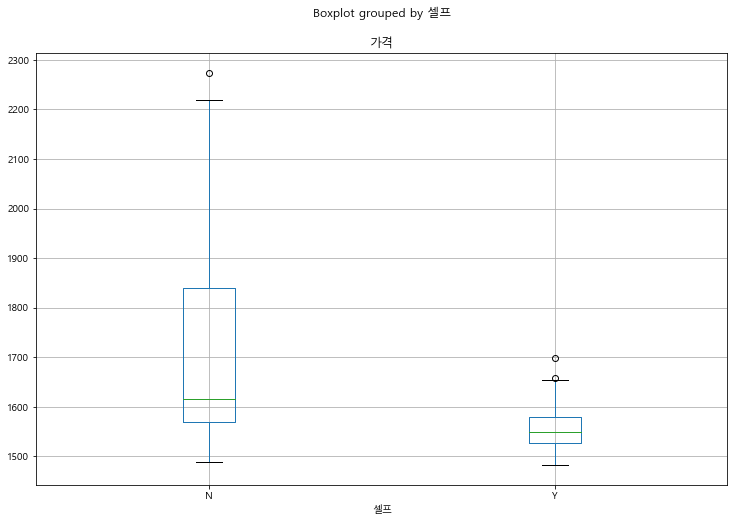

In [51]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

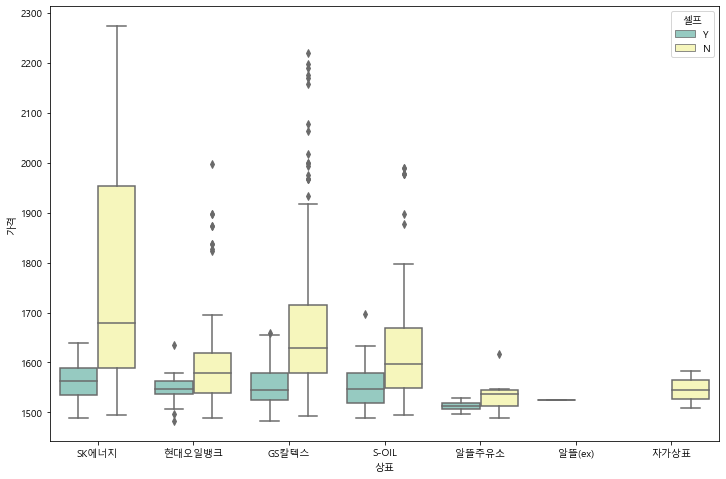

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

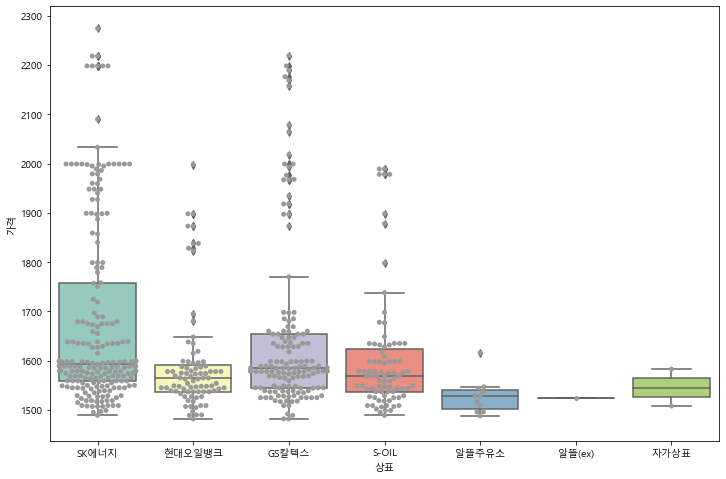

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

## 서울시 구별 주유 가격 확인하기

In [54]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

### 가격 값으로 역순 정렬

In [55]:
stations.sort_values(by='가격', ascending=False).head(10)

,level_0,Oil_store,주소,가격,셀프,상표,구
519,519,서남주유소,서울 중구 통일로 30,2274.0,N,SK에너지,중구
518,518,SC(주) 역전주유소,서울 중구 퇴계로 15,2219.0,N,GS칼텍스,중구
39,39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
79,79,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
517,517,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구
482,482,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
516,516,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구
506,506,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구
507,507,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
481,481,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구


In [56]:
stations.sort_values(by='가격', ascending=True).head(10)

,level_0,Oil_store,주소,가격,셀프,상표,구
354,354,이케이에너지㈜ 강산주유소,서울 성북구 보문로 27 (보문동7가),1482.0,Y,GS칼텍스,성북구
355,355,강산제2주유소,서울 성북구 보국문로 52,1482.0,Y,현대오일뱅크,성북구
356,356,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1482.0,Y,GS칼텍스,성북구
357,357,원천주유소,서울 성북구 돌곶이로 142 (장위동),1488.0,N,알뜰주유소,성북구
96,96,수유동주유소,서울 강북구 도봉로 395 (수유동),1489.0,Y,GS칼텍스,강북구
98,98,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1489.0,Y,S-OIL,강북구
225,225,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1489.0,Y,SK에너지,도봉구
97,97,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1489.0,N,현대오일뱅크,강북구
227,227,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1490.0,N,현대오일뱅크,도봉구
226,226,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1490.0,N,현대오일뱅크,도봉구


### 피봇 테이블로 구별로 가격의 평균값으로  정리하기 

In [58]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data

,가격
구,
강남구,1758.900000
강동구,1630.125000
강북구,1522.076923
강서구,1574.794118
관악구,1594.062500
광진구,1565.529412
구로구,1606.857143
금천구,1555.230769
노원구,1607.266667


## 가격별로 구 소팅하기 

In [61]:
type(gu_data)

pandas.core.frame.DataFrame

In [65]:
gu_data.sort_values(by='가격', ascending=False)

,가격
구,
중구,2055.250000
용산구,1987.500000
종로구,1883.888889
강남구,1758.900000
마포구,1748.000000
성동구,1654.588235
서초구,1643.805556
영등포구,1637.843750
강동구,1630.125000


### map.choropleth()를 이용한 지도 시각화 

In [60]:
geo_path = '../../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map